In [1]:
#importing packages and identifying/importing csv file

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
medical=pd.read_csv('medical_clean.csv')

In [2]:
# profiling dataframe. No null values
medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [3]:
# import statistics package and see where the data characteristics
import statistics
medical.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,50159.323900,38.751099,-91.243080,9965.253800,2.097200,53.511700,40490.495160,17.964262,5.012200,...,5312.172769,12934.528587,3.518800,3.506700,3.511100,3.515100,3.496900,3.522500,3.494000,3.509700
std,2886.89568,27469.588208,5.403085,15.205998,14824.758614,2.163659,20.638538,28521.153293,2.017231,1.045734,...,2180.393838,6542.601544,1.031966,1.034825,1.032755,1.036282,1.030192,1.032376,1.021405,1.042312
min,1.00000,610.000000,17.967190,-174.209700,0.000000,0.000000,18.000000,154.080000,9.806483,1.000000,...,1938.312067,3125.703000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,27592.000000,35.255120,-97.352982,694.750000,0.000000,36.000000,19598.775000,16.626439,4.000000,...,3179.374015,7986.487755,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,50207.000000,39.419355,-88.397230,2769.000000,1.000000,53.000000,33768.420000,17.951122,5.000000,...,5213.952000,11573.977735,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000
75%,7500.25000,72411.750000,42.044175,-80.438050,13945.000000,3.000000,71.000000,54296.402500,19.347963,6.000000,...,7459.699750,15626.490000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.560990,-65.290170,122814.000000,10.000000,89.000000,207249.100000,26.394449,9.000000,...,9180.728000,30566.070000,8.000000,7.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000


Begin identifying duplicates section

In [4]:
# identifying any duplicates
medical.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [5]:
# seeing full value count of duplicates: no duplicates in file
print(medical.duplicated().value_counts())

False    10000
Name: count, dtype: int64


In [6]:
# looking into missing data
medical.isnull().sum()

CaseOrder             0
Customer_id           0
Interaction           0
UID                   0
City                  0
State                 0
County                0
Zip                   0
Lat                   0
Lng                   0
Population            0
Area                  0
TimeZone              0
Job                   0
Children              0
Age                   0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
TotalCharge           0
Additional_charg

Begin PCA section

In [7]:
medical_df=medical.select_dtypes('number')
medical_cols=medical_df.drop(['CaseOrder', 'Zip','Item1',
                              'Item2','Item3','Item4','Item5','Item6','Item7','Item8',
                              'Children', 'Population', 'Age','Doc_visits','Full_meals_eaten',
                              'vitD_supp'], axis=1)

medical_cols

,Lat,Lng,Income,VitD_levels,Initial_days,TotalCharge,Additional_charges
0,34.34960,-86.72508,86575.93,19.141466,10.585770,3726.702860,17939.403420
1,30.84513,-85.22907,46805.99,18.940352,15.129562,4193.190458,17612.998120
2,43.54321,-96.63772,14370.14,18.057507,4.772177,2434.234222,17505.192460
3,43.89744,-93.51479,39741.49,16.576858,1.714879,2127.830423,12993.437350
4,37.59894,-76.88958,1209.56,17.439069,1.254807,2113.073274,3716.525786
...,...,...,...,...,...,...,...
9995,36.42886,-78.23716,45967.61,16.980860,51.561220,6850.942000,8927.642000
9996,39.43609,-74.87302,14983.02,18.177020,68.668240,7741.690000,28507.150000
9997,36.36655,-87.29988,65917.81,17.129070,70.154180,8276.481000,15281.210000
9998,44.10354,-102.01590,29702.32,19.910430,63.356900,7644.483000,7781.678000


In [8]:
# create heatmap to see if any variables are highly correlated with eachother
corr=medical_cols.corr()
corr.style.background_gradient(cmap='coolwarm')

,Lat,Lng,Income,VitD_levels,Initial_days,TotalCharge,Additional_charges
Lat,1.000000,-0.112348,-0.019369,0.001493,-0.008820,-0.010759,-0.002283
Lng,-0.112348,1.000000,-0.006665,-0.006389,-0.009292,-0.008830,0.000079
Income,-0.019369,-0.006665,1.000000,-0.013115,-0.012465,-0.014345,-0.009825
VitD_levels,0.001493,-0.006389,-0.013115,1.000000,-0.003642,-0.001403,0.008290
Initial_days,-0.008820,-0.009292,-0.012465,-0.003642,1.000000,0.987640,0.004409
TotalCharge,-0.010759,-0.008830,-0.014345,-0.001403,0.987640,1.000000,0.029256
Additional_charges,-0.002283,0.000079,-0.009825,0.008290,0.004409,0.029256,1.000000


In [9]:
scaler=StandardScaler()
medical_scaled=scaler.fit_transform(medical_cols)
medical_scaled=pd.DataFrame(medical_scaled, columns=medical_cols.columns)
print(medical_scaled.head())

        Lat       Lng    Income  VitD_levels  Initial_days  TotalCharge  \
0 -0.814668  0.297134  1.615914     0.583603     -0.907310    -0.727185   
1 -1.463305  0.395522  0.221443     0.483901     -0.734595    -0.513228   
2  0.886966 -0.354788 -0.915870     0.046227     -1.128292    -1.319983   
3  0.952530 -0.149403 -0.026263    -0.687811     -1.244503    -1.460517   
4 -0.213252  0.943984 -1.377325    -0.260366     -1.261991    -1.467285   

   Additional_charges  
0            0.765005  
1            0.715114  
2            0.698635  
3            0.009004  
4           -1.408991  


In [10]:
# saving CSV file 
medical_scaled.to_csv('medical_prepared.csv', index = 'False')

In [11]:
#instantiate PCA
pca=PCA()
medical_pc=pca.fit_transform(medical_scaled)
print(medical_pc)

[[-1.16232809 -0.89116719  0.20242862 ...  1.49484808 -0.0746936
   0.113405  ]
 [-0.85651247 -1.30469681 -0.59465829 ...  0.5669678  -0.69372811
   0.14111486]
 [-1.70285184  0.95600301 -0.94321758 ... -0.64507604  0.20537163
  -0.14821563]
 ...
 [ 1.91521692 -0.59678638  0.61472305 ...  0.30014236  0.0442254
  -0.0030557 ]
 [ 1.51318798  1.28679811 -0.26059217 ...  0.4986083   0.19941288
  -0.00643024]
 [ 1.77977836 -0.33350922  0.42999298 ...  0.57957825  0.90031483
  -0.1381137 ]]


In [12]:
medical_loading = pd.DataFrame(pca.components_, 
                               columns = ["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7"], 
                               index = medical_cols.columns)

medical_loading

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
Lat,-0.012385,-0.011393,-0.019039,-0.003094,0.706503,0.706831,0.024252
Lng,0.707635,-0.698869,-0.086107,0.058388,0.000265,-0.001082,-0.003272
Income,0.012997,-0.109214,0.621626,-0.576982,0.022866,0.007592,-0.517683
VitD_levels,-0.008349,-0.088224,0.392351,-0.328228,-0.020951,-0.000811,0.854420
Initial_days,-0.093509,-0.112635,0.651181,0.744122,0.009143,0.009079,-0.025478
TotalCharge,0.700082,0.692138,0.166813,0.047118,0.014145,0.013292,0.020168
Additional_charges,0.001355,-0.000174,0.001180,-0.001440,-0.706830,0.707157,-0.017759


In [13]:
# show explained variance ratio and cumulative sum for PCS
print(f"explained variance ratio:",pca.explained_variance_ratio_)

print(f"cumulative sum explained variance ratio:", pca.explained_variance_ratio_.cumsum())

explained variance ratio: [0.28412968 0.15906567 0.14578394 0.14174028 0.14127954 0.12628061
 0.00172027]
cumulative sum explained variance ratio: [0.28412968 0.44319536 0.58897929 0.73071957 0.87199911 0.99827973
 1.        ]


In [14]:
# print list of contributions to total variance
pc_percentages = list(pca.explained_variance_ratio_)
pc_cols = list(medical_loading.columns)
for i in range(len(pc_cols)):
    print(f"{pc_cols[i]}, the percent of total variance is {round(pc_percentages[i] * 100, 3)}%")

PC1, the percent of total variance is 28.413%
PC2, the percent of total variance is 15.907%
PC3, the percent of total variance is 14.578%
PC4, the percent of total variance is 14.174%
PC5, the percent of total variance is 14.128%
PC6, the percent of total variance is 12.628%
PC7, the percent of total variance is 0.172%


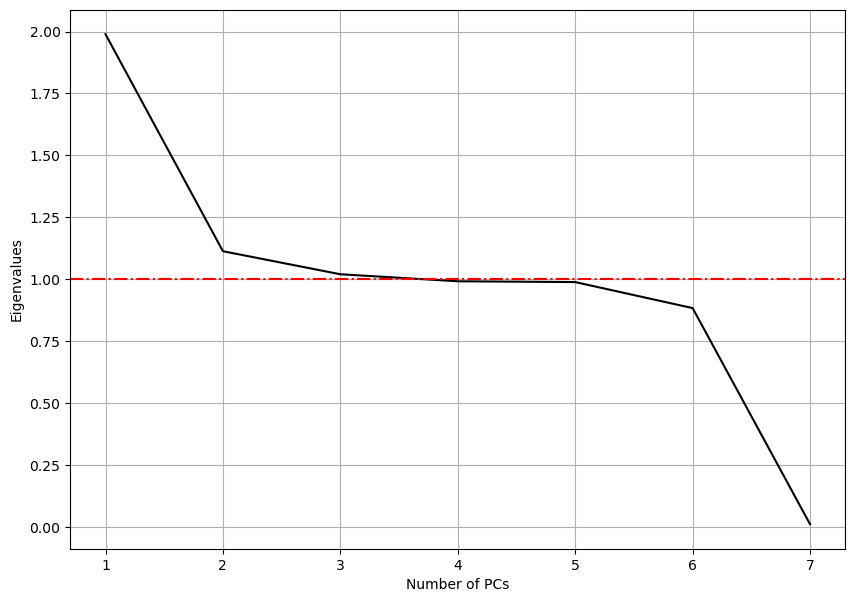

In [15]:
# scree plot (kaiser method) to look at the contribution of every component to the variance
exp_var=pca.explained_variance_
pc_list=(np.arange(pca.n_components_)+1)

plt.figure(figsize=(10,7))
plt.plot(pc_list,exp_var, "black")
plt.xlabel("Number of PCs")
plt.ylabel("Eigenvalues")
plt.axhline(y=1,color='r', linestyle='dashdot')
plt.grid()
plt.show()

In [16]:
# can see from the kaiser method that 4 PCs is the number where the line crosses the y=1 x-axis

print(f"variance of first 4 PCs:", pca.explained_variance_ratio_[:4])

total_variance=np.sum(pc_percentages[:4]) / np.sum(pc_percentages)
print(f"total variance identified by the first 4 PCs:", total_variance)

#the 4 PCs make up 73% of the total variance 

variance of first 4 PCs: [0.28412968 0.15906567 0.14578394 0.14174028]
total variance identified by the first 4 PCs: 0.7307195715387494


In [17]:
# Final reduced PC components
final_pc=medical_loading[["PC1", "PC2", "PC3", "PC4"]] 

final_pc

,PC1,PC2,PC3,PC4
Lat,-0.012385,-0.011393,-0.019039,-0.003094
Lng,0.707635,-0.698869,-0.086107,0.058388
Income,0.012997,-0.109214,0.621626,-0.576982
VitD_levels,-0.008349,-0.088224,0.392351,-0.328228
Initial_days,-0.093509,-0.112635,0.651181,0.744122
TotalCharge,0.700082,0.692138,0.166813,0.047118
Additional_charges,0.001355,-0.000174,0.001180,-0.001440
